In [5]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [16]:
img = cv2.imread('hmson1.avi_000079750.png',0) #mario
img2 = img.copy()
template = cv2.imread('20201105_125557.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

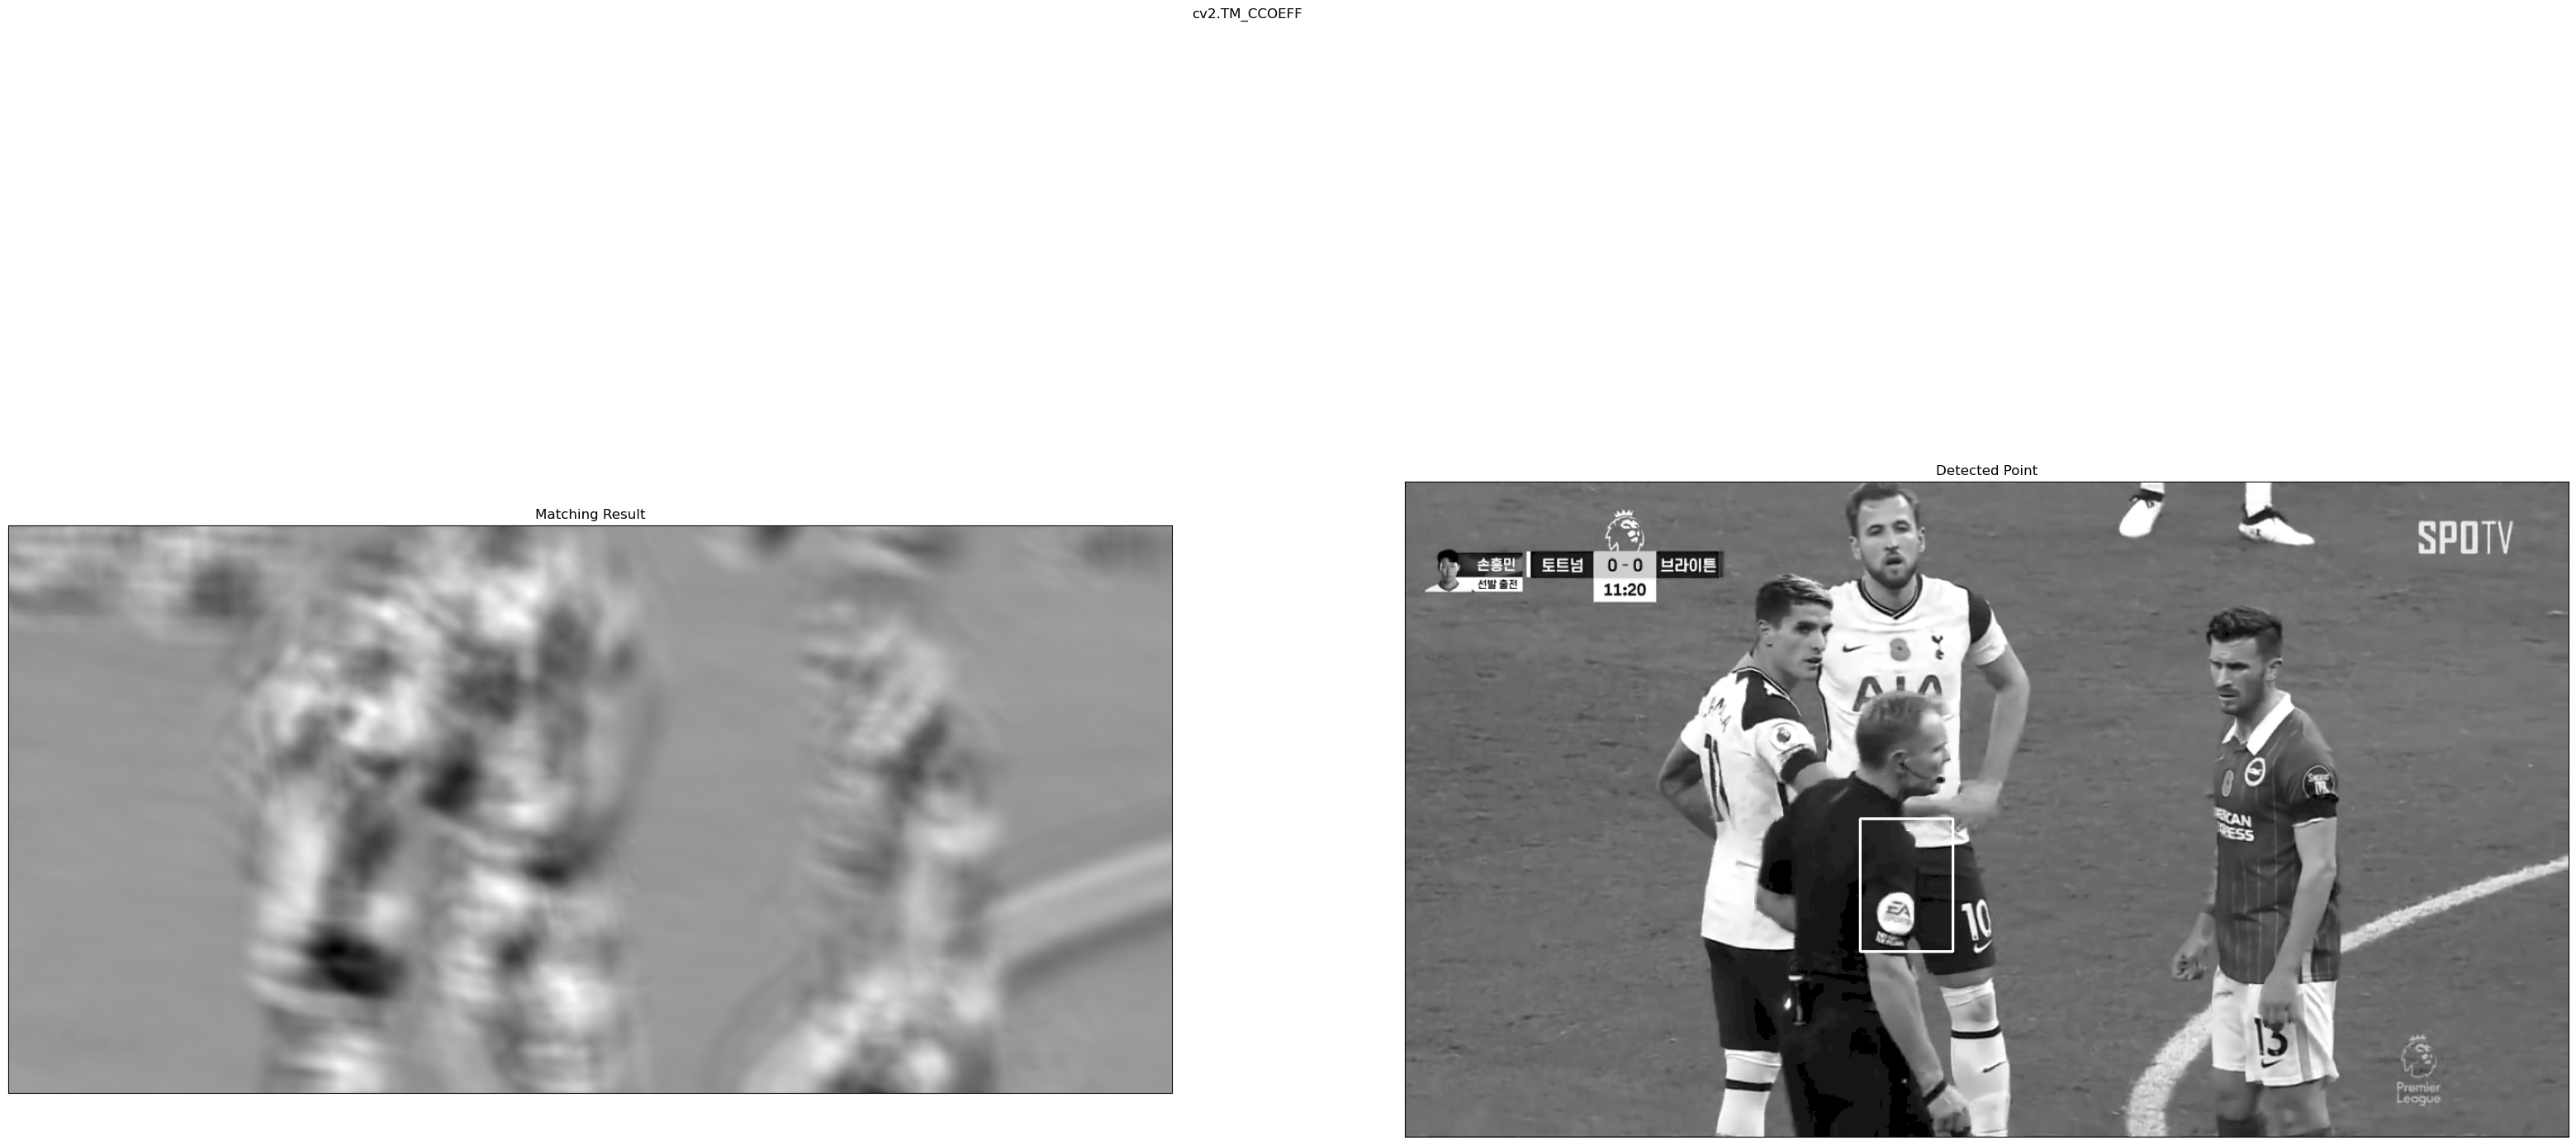

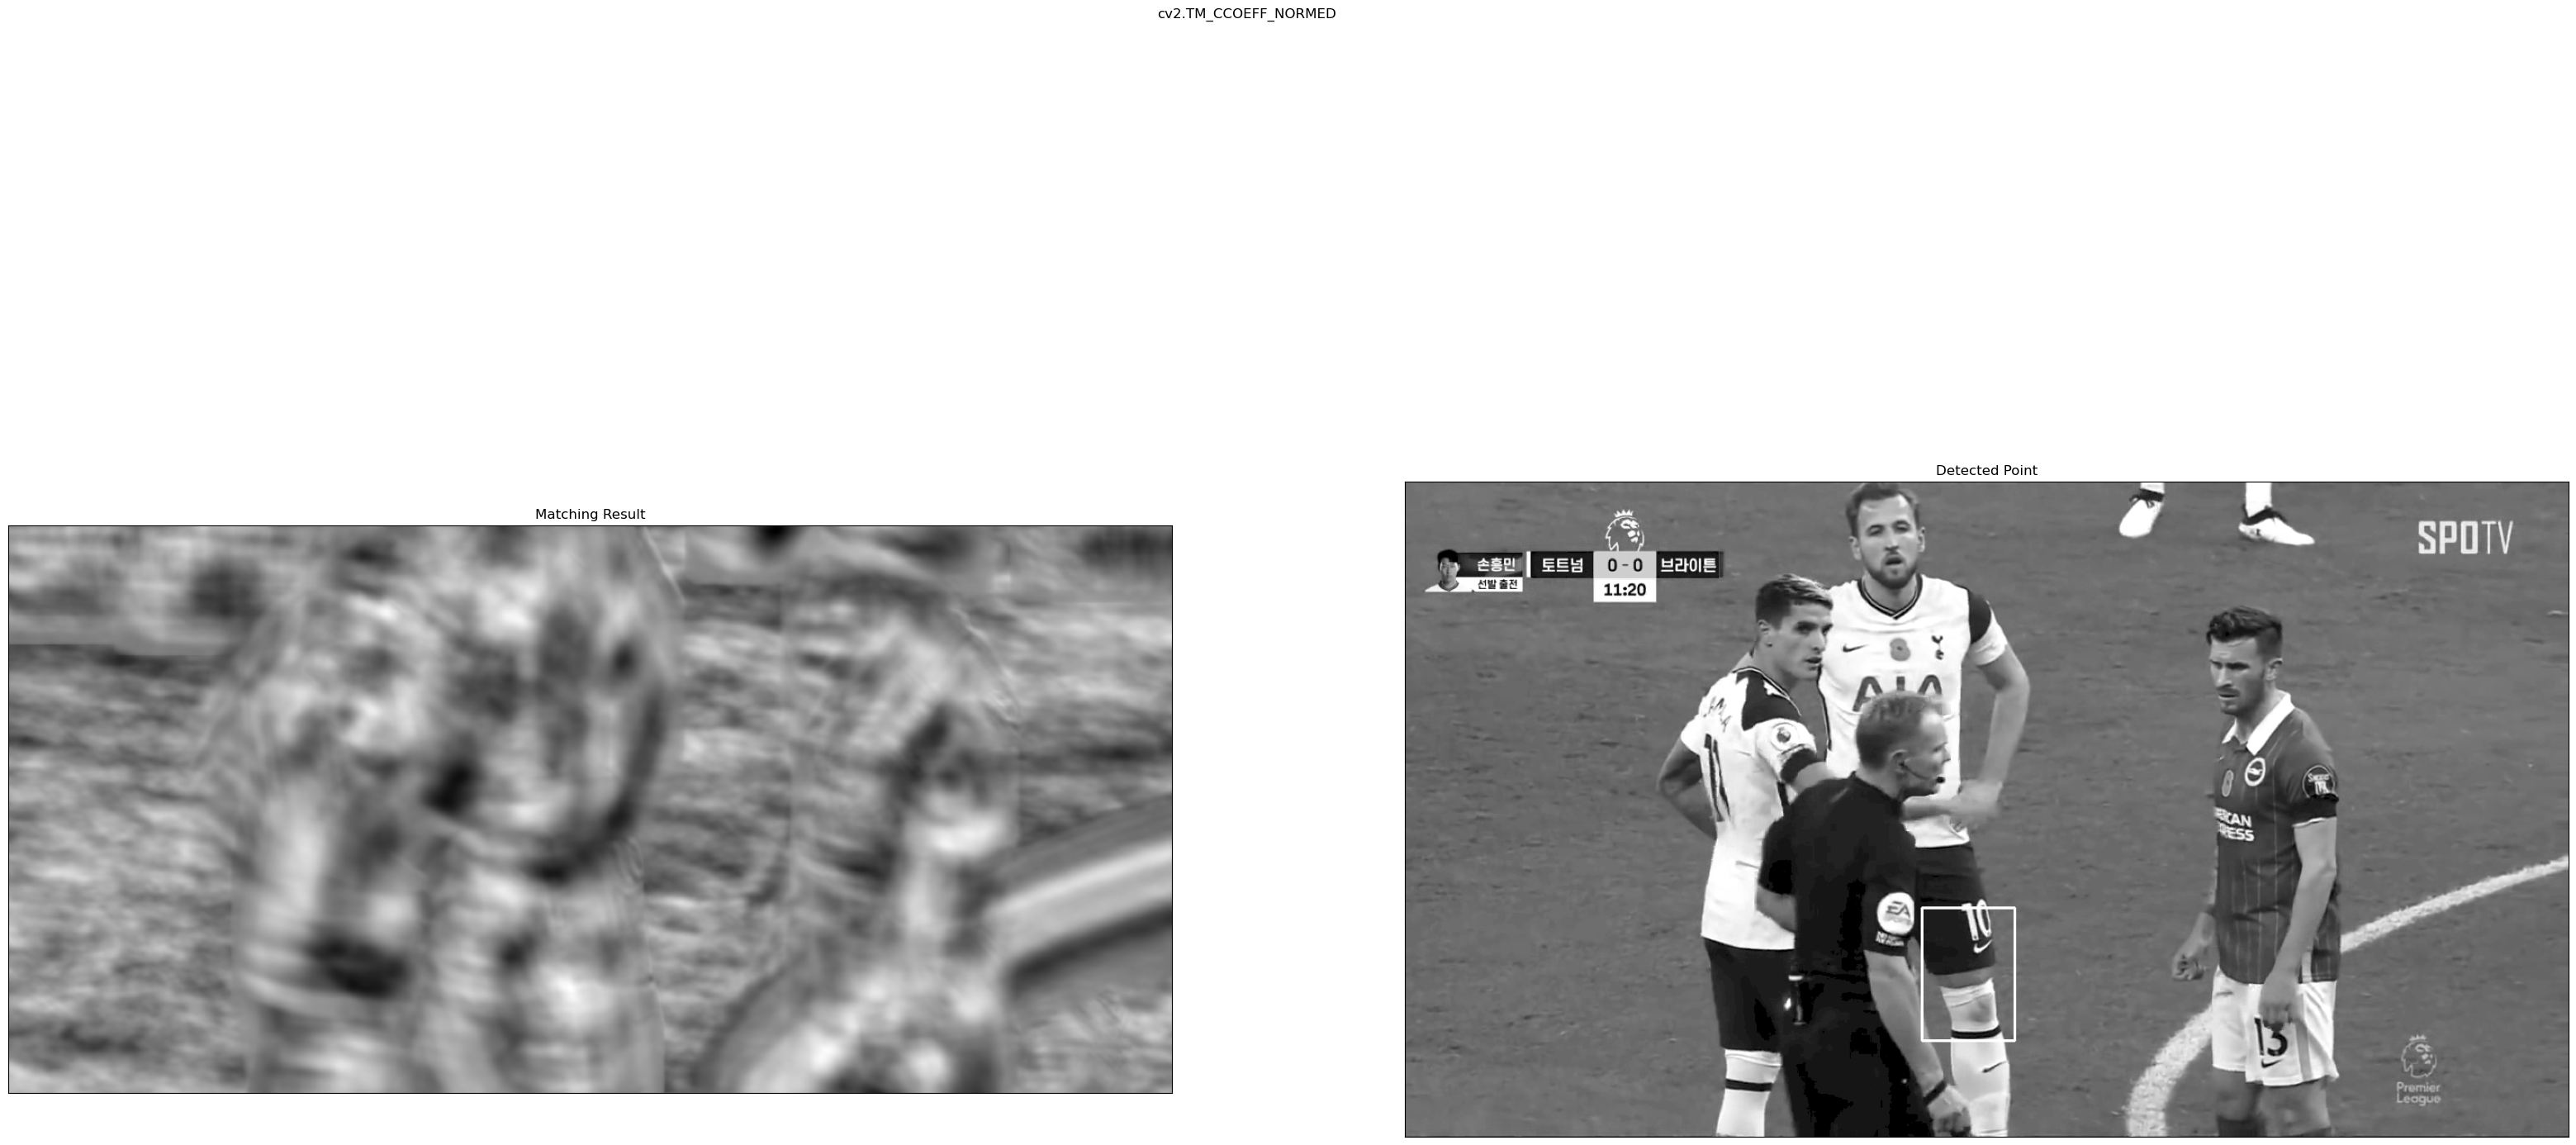

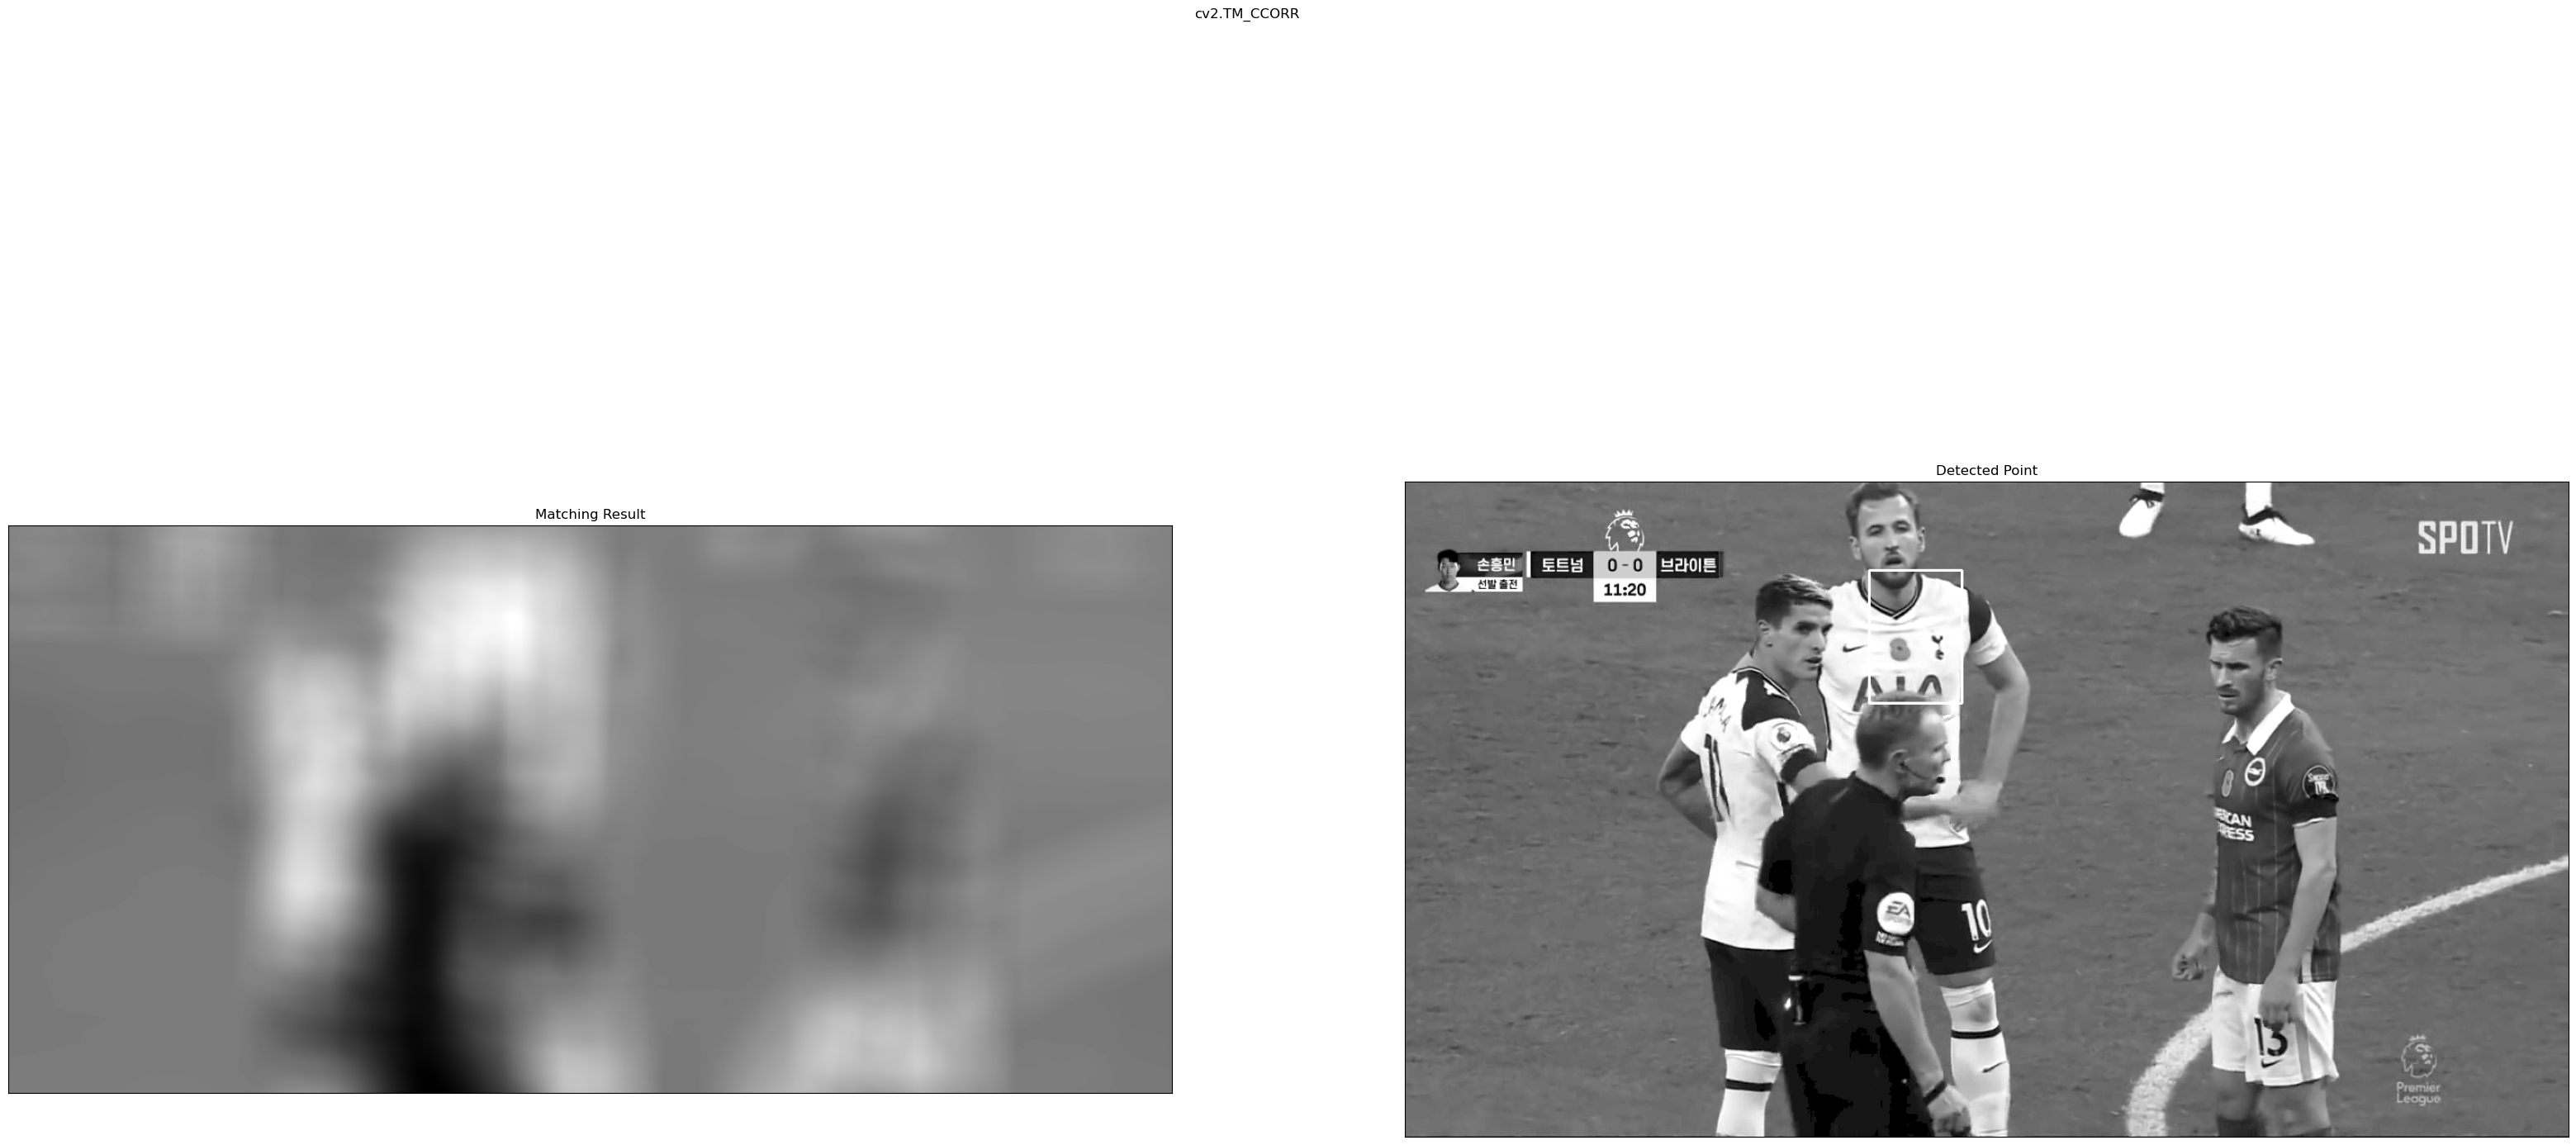

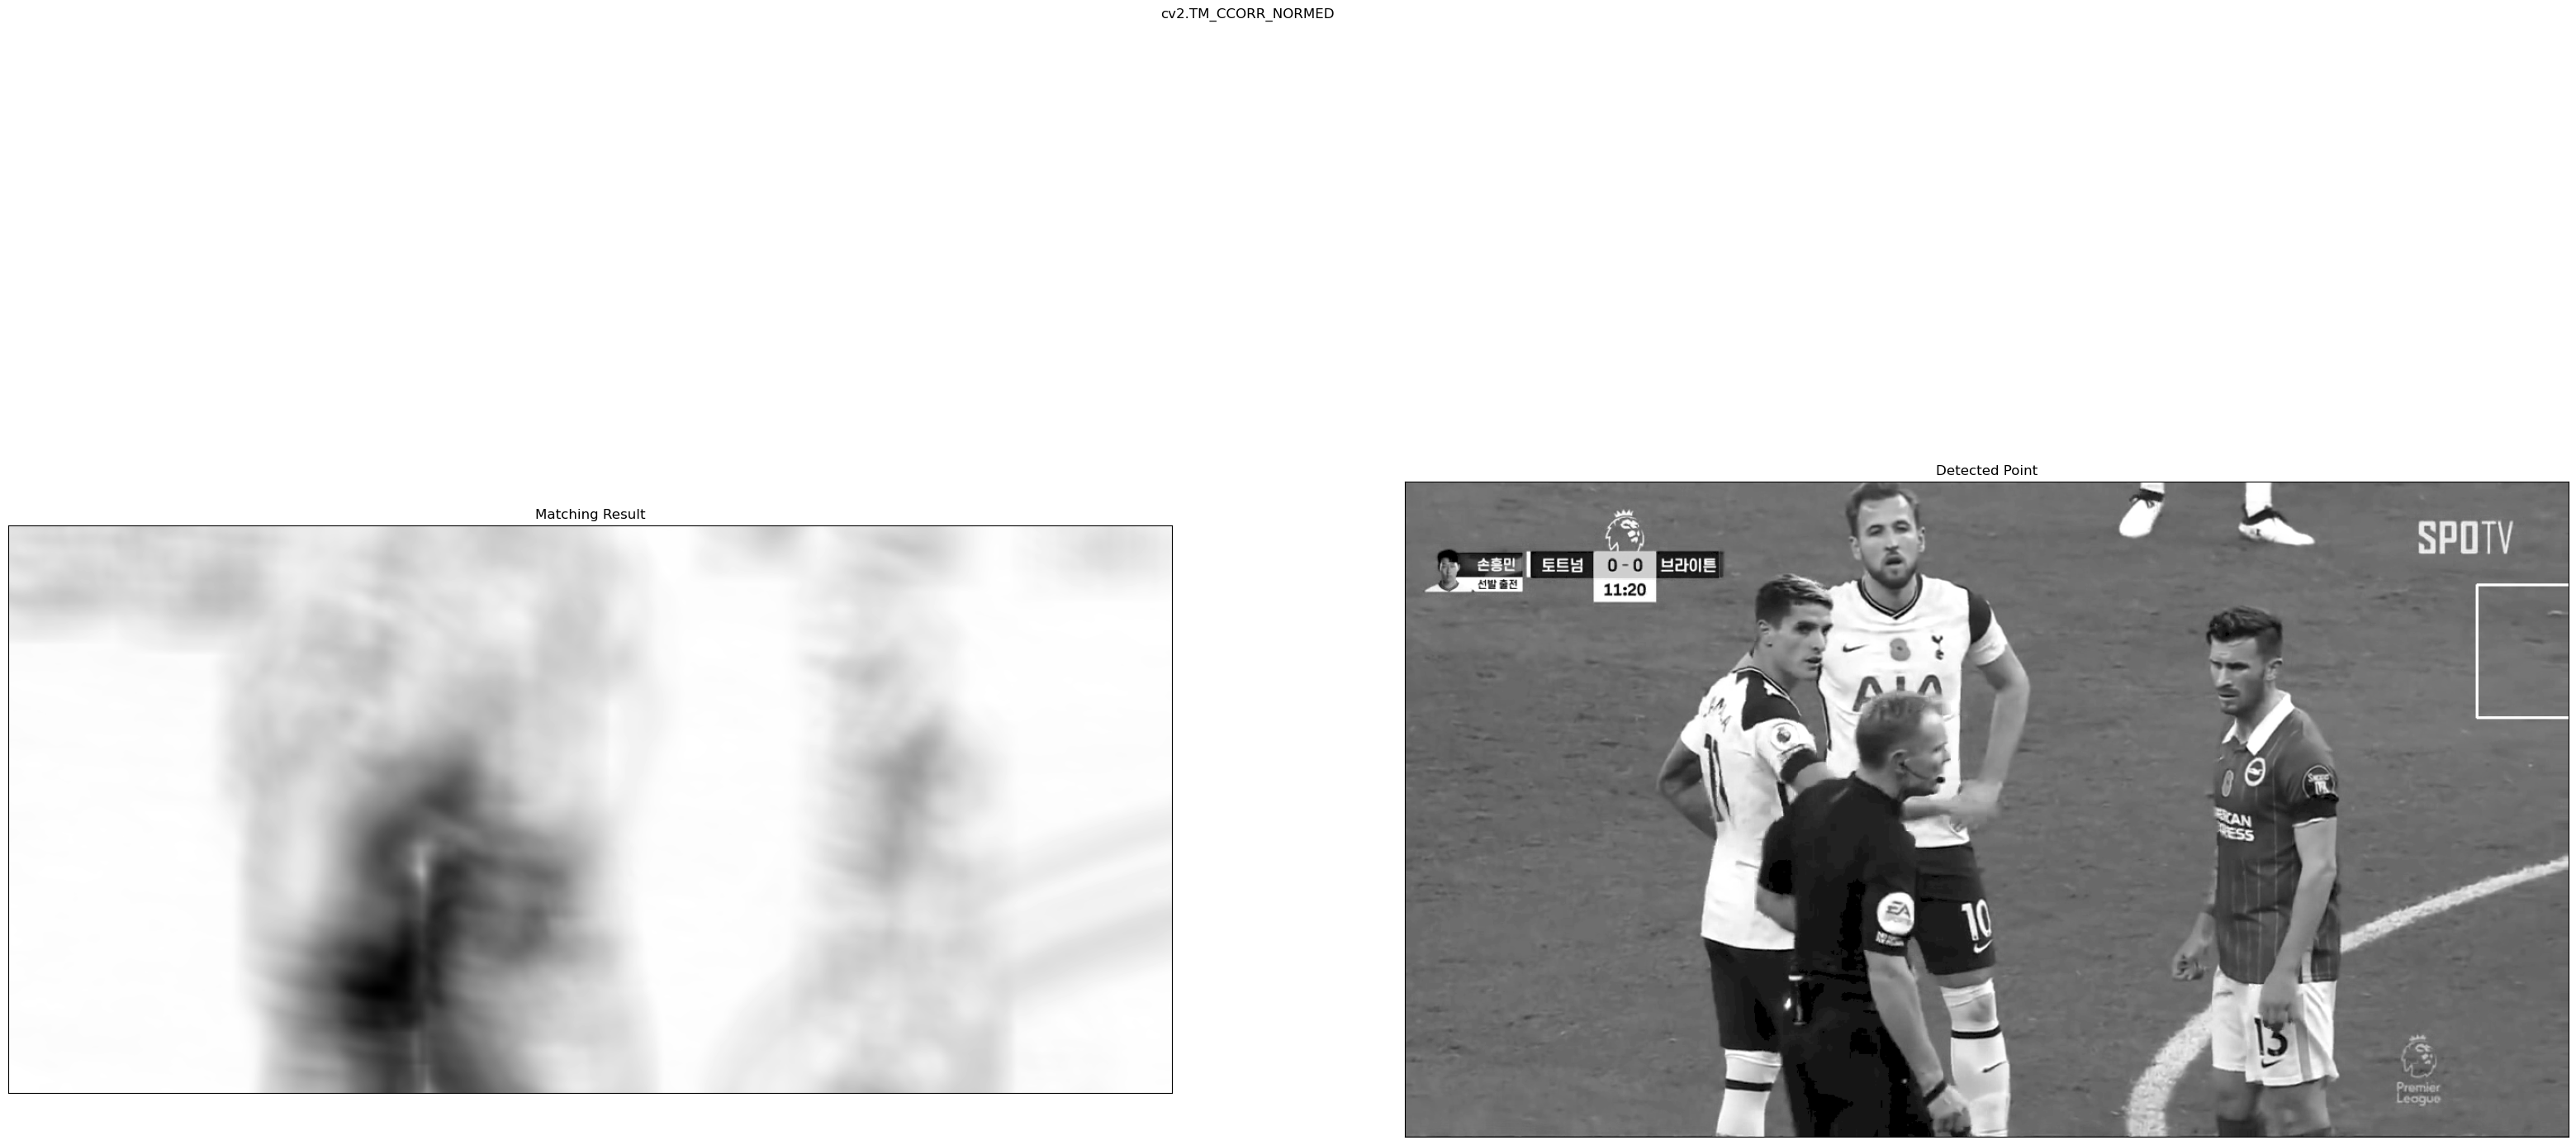

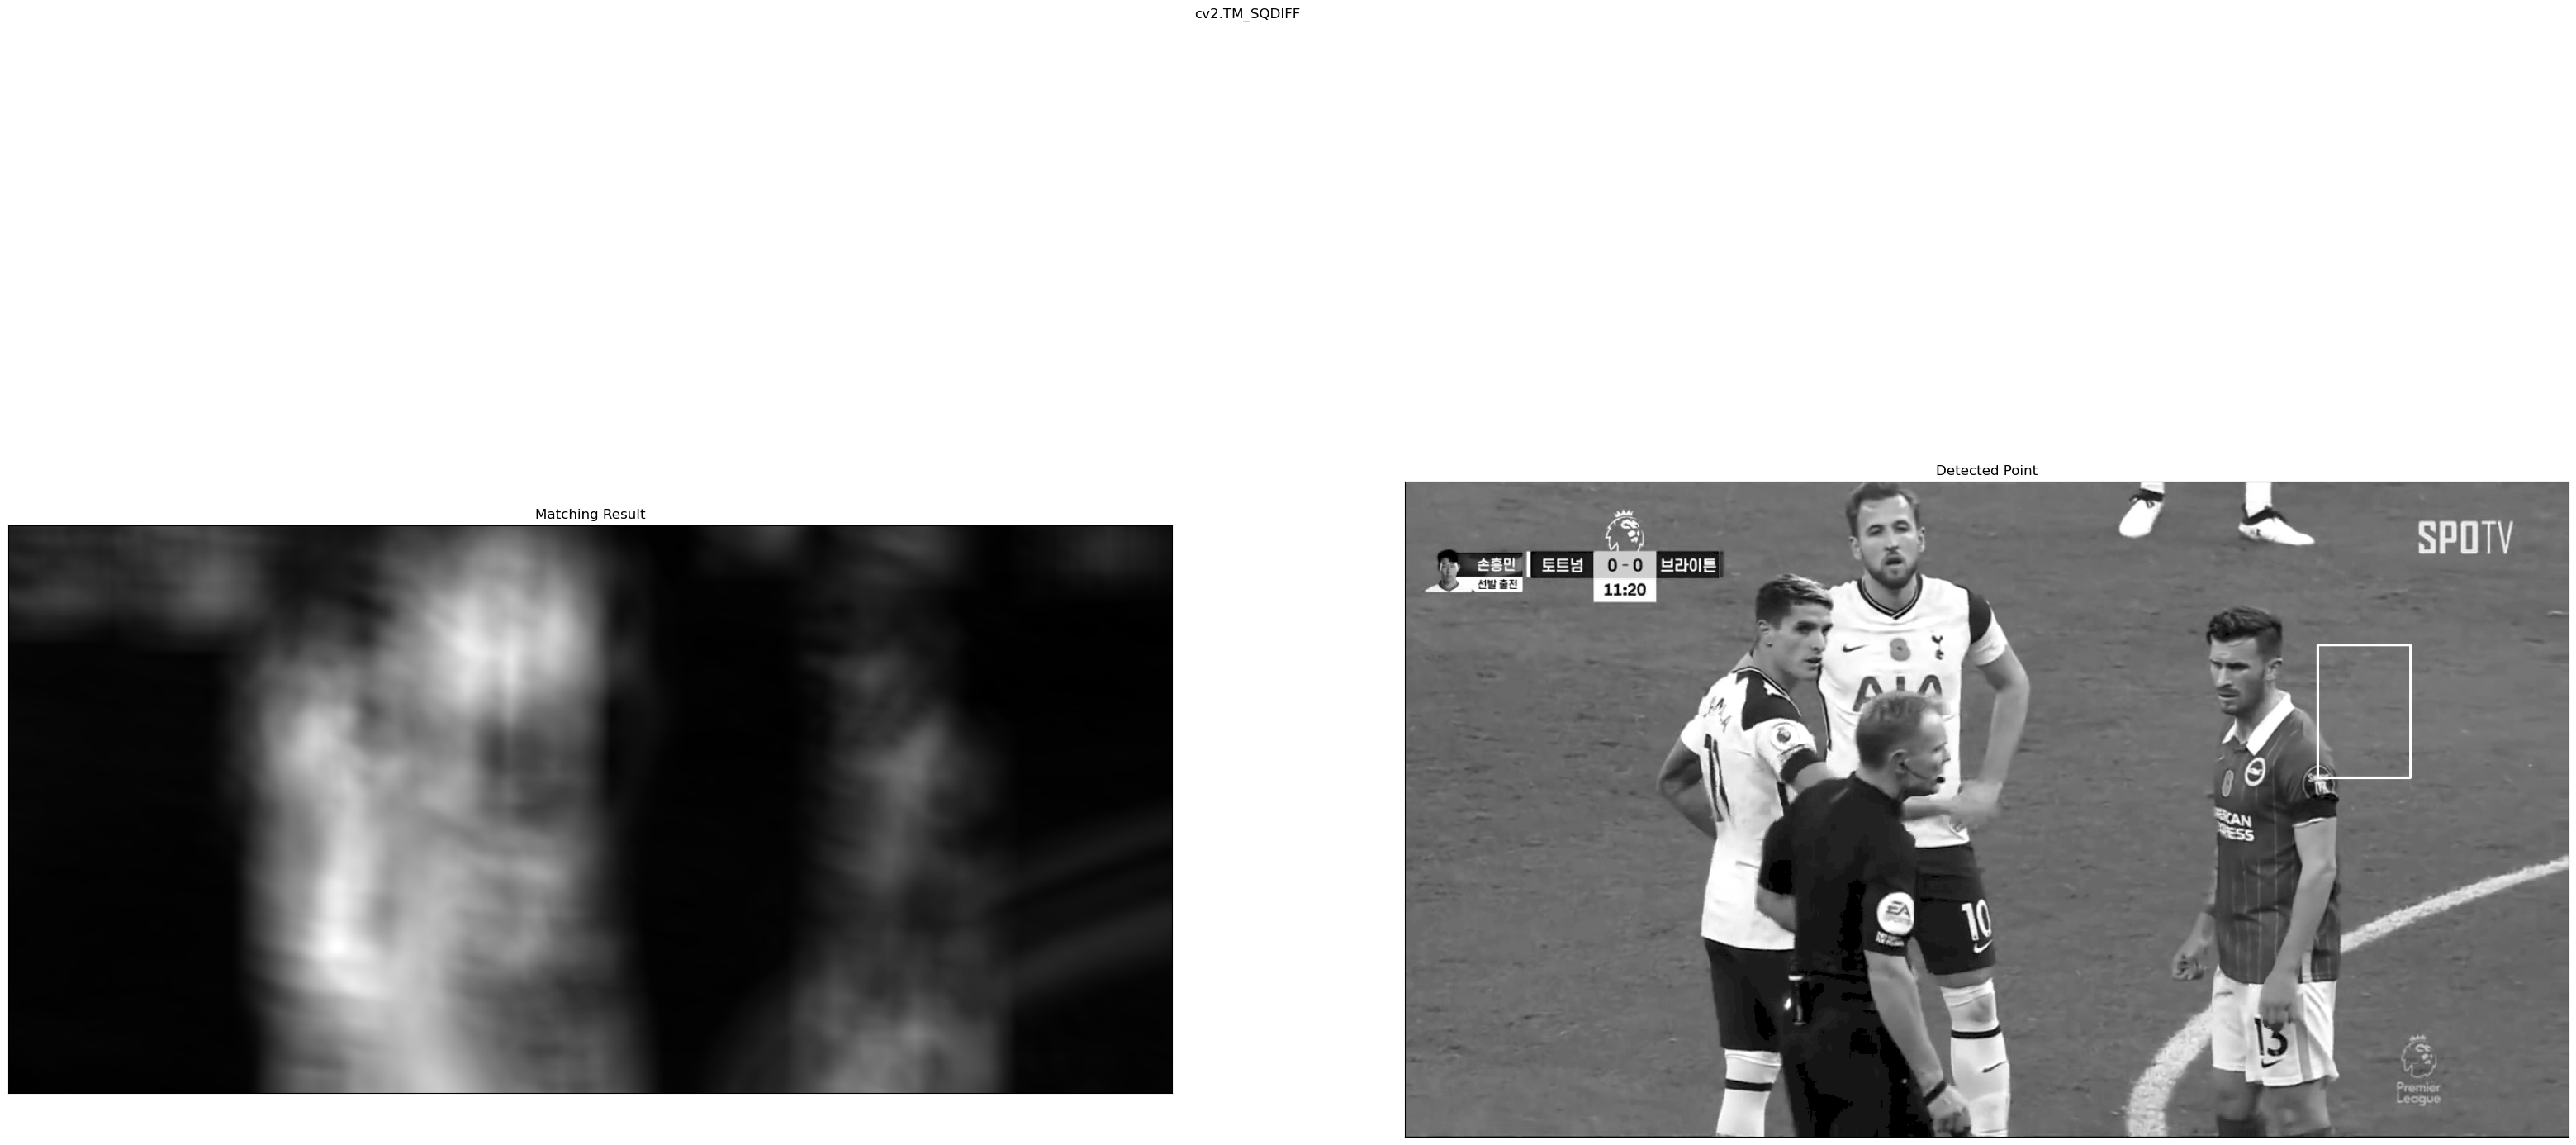

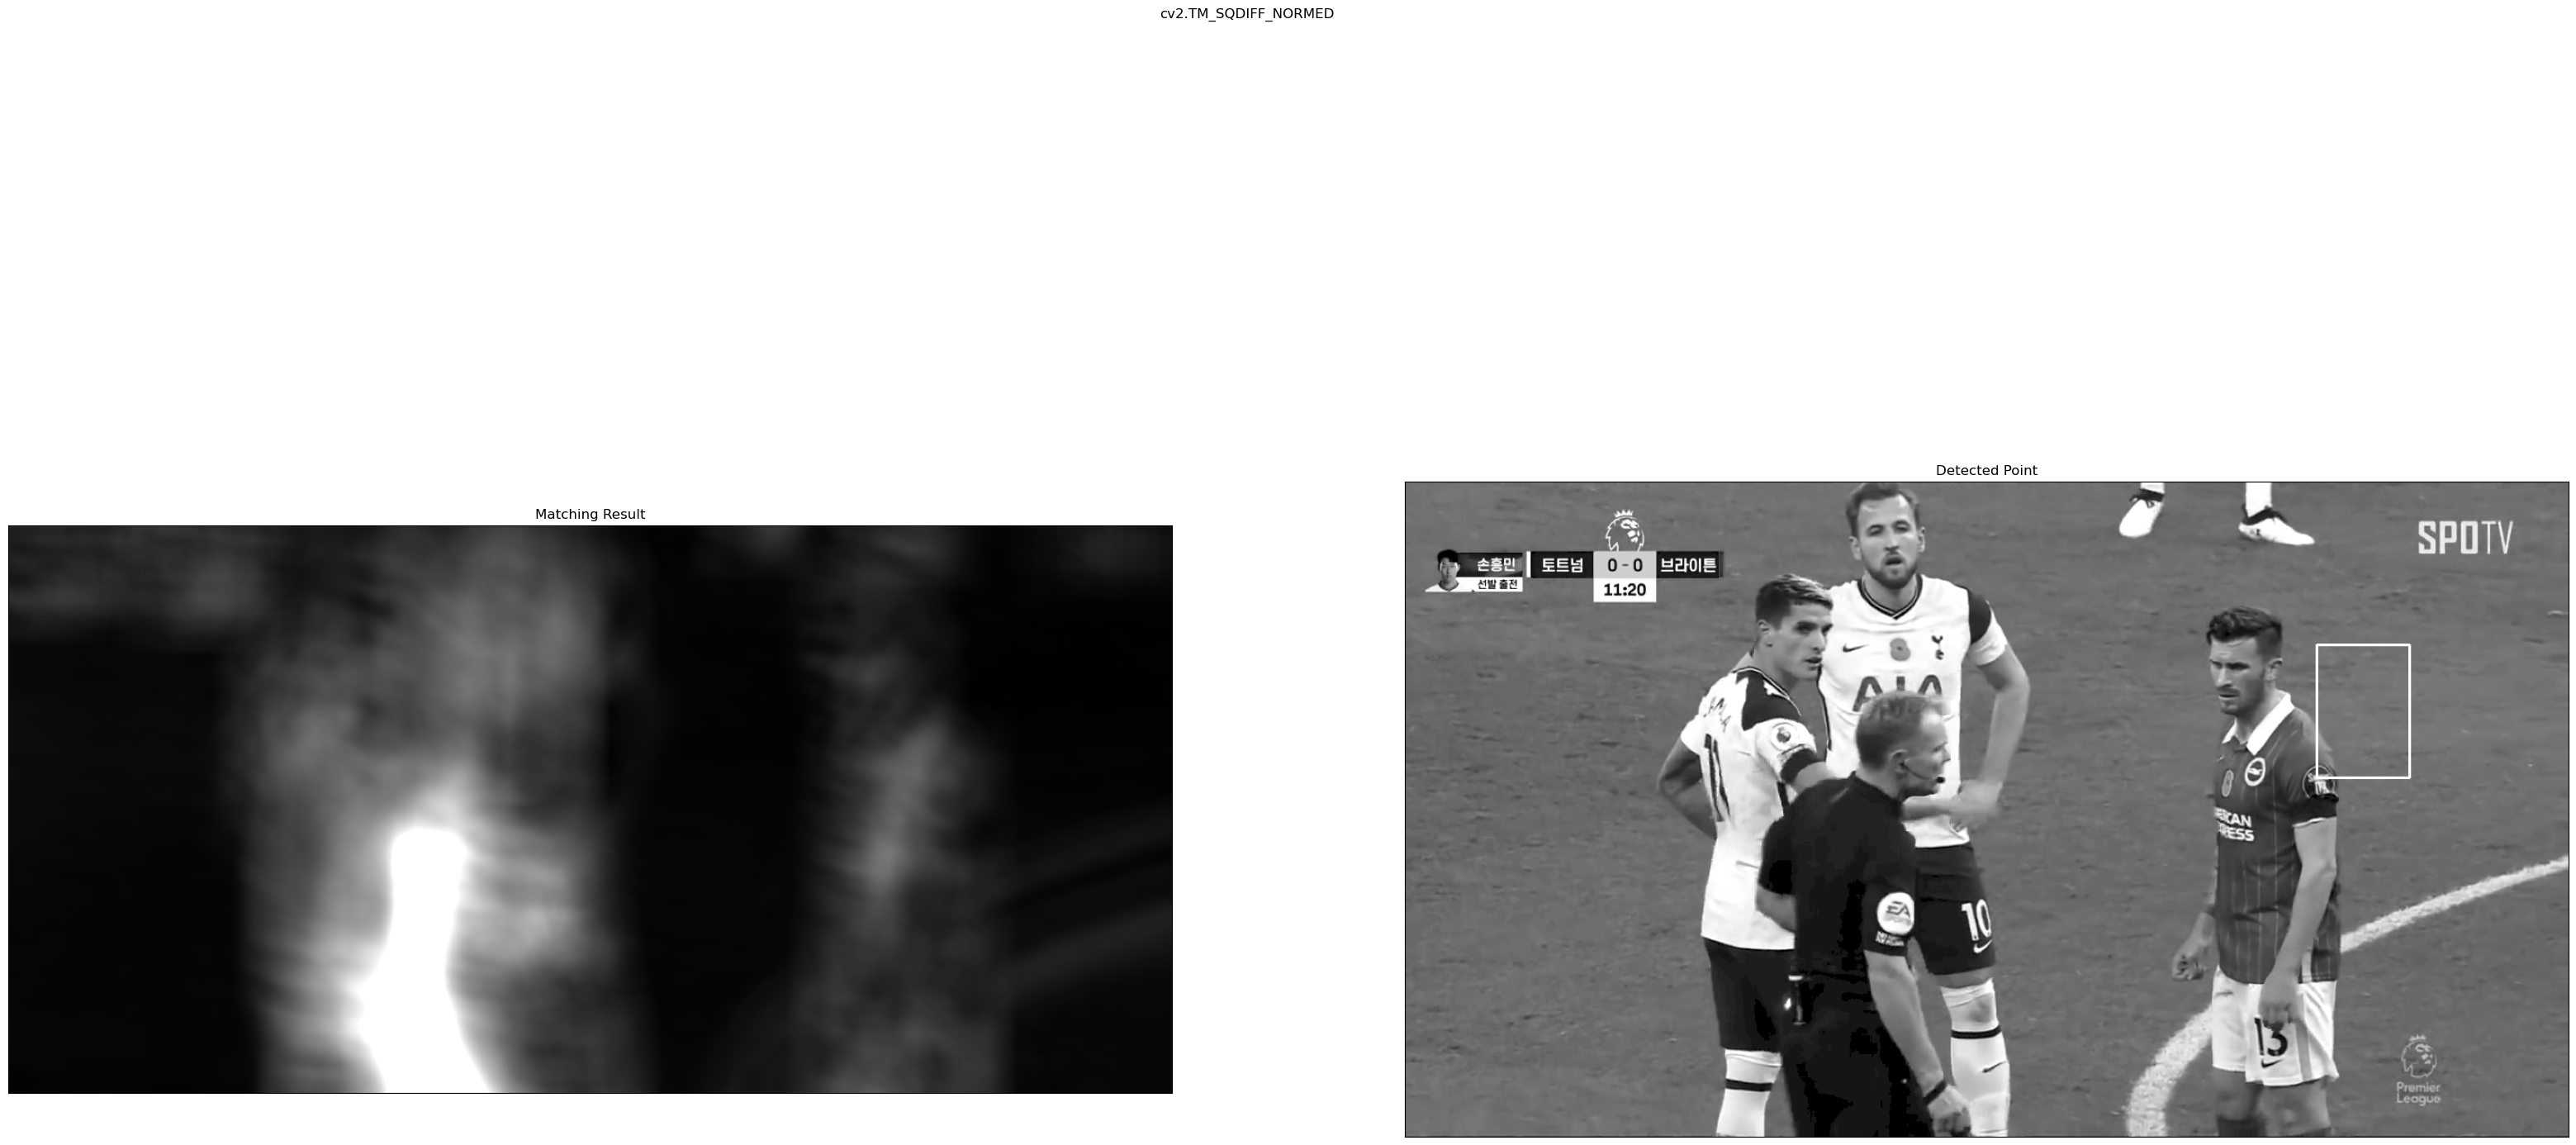

In [18]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


In [25]:
img_rgb = cv2.imread('mario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[162:162+50, 232:232+46]
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

In [27]:

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
  cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res.png',img_rgb)


True

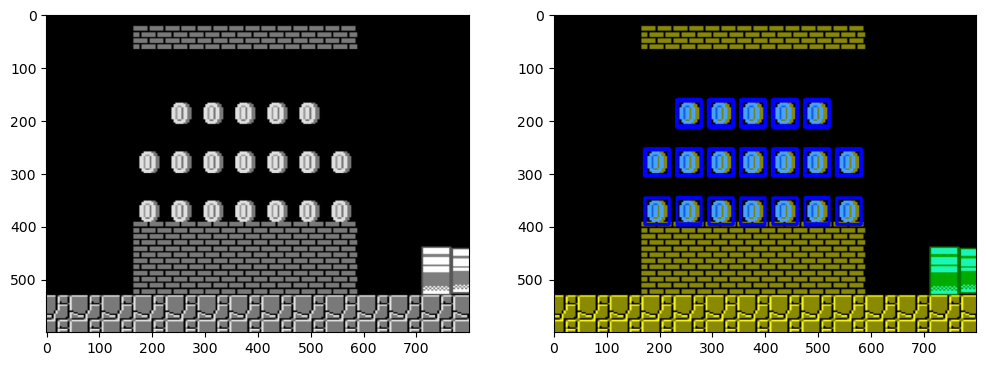

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img_gray, 'gray')
plt.subplot(122), plt.imshow(img_rgb)
plt.show()

In [19]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [20]:
def nothing(x):
    pass



In [21]:
img = cv2.imread('dsu7.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

In [24]:

cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [25]:
cv2.namedWindow('image')
cv2.createTrackbar('minLineLength', 'image', 1, 500, nothing)
cv2.createTrackbar('maxLineGap', 'image', 1, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 500, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    lineLength = cv2.getTrackbarPos('minLineLength', 'image')
    lineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLinesP(edges,rho = 1,theta = np.pi/180,threshold = 100,minLineLength = lineLength,maxLineGap = lineGap)
   
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])+"minLineLength:"+str(lineLength)  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [35]:
filename = 'dsu7.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [36]:
def nothing(x):
    pass


cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 1000, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold=1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [40]:
filename = 'dsu7.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [41]:
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('dsu7.jpg')
imgsift = cv2.drawKeypoints(img,kp,imgsift,  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


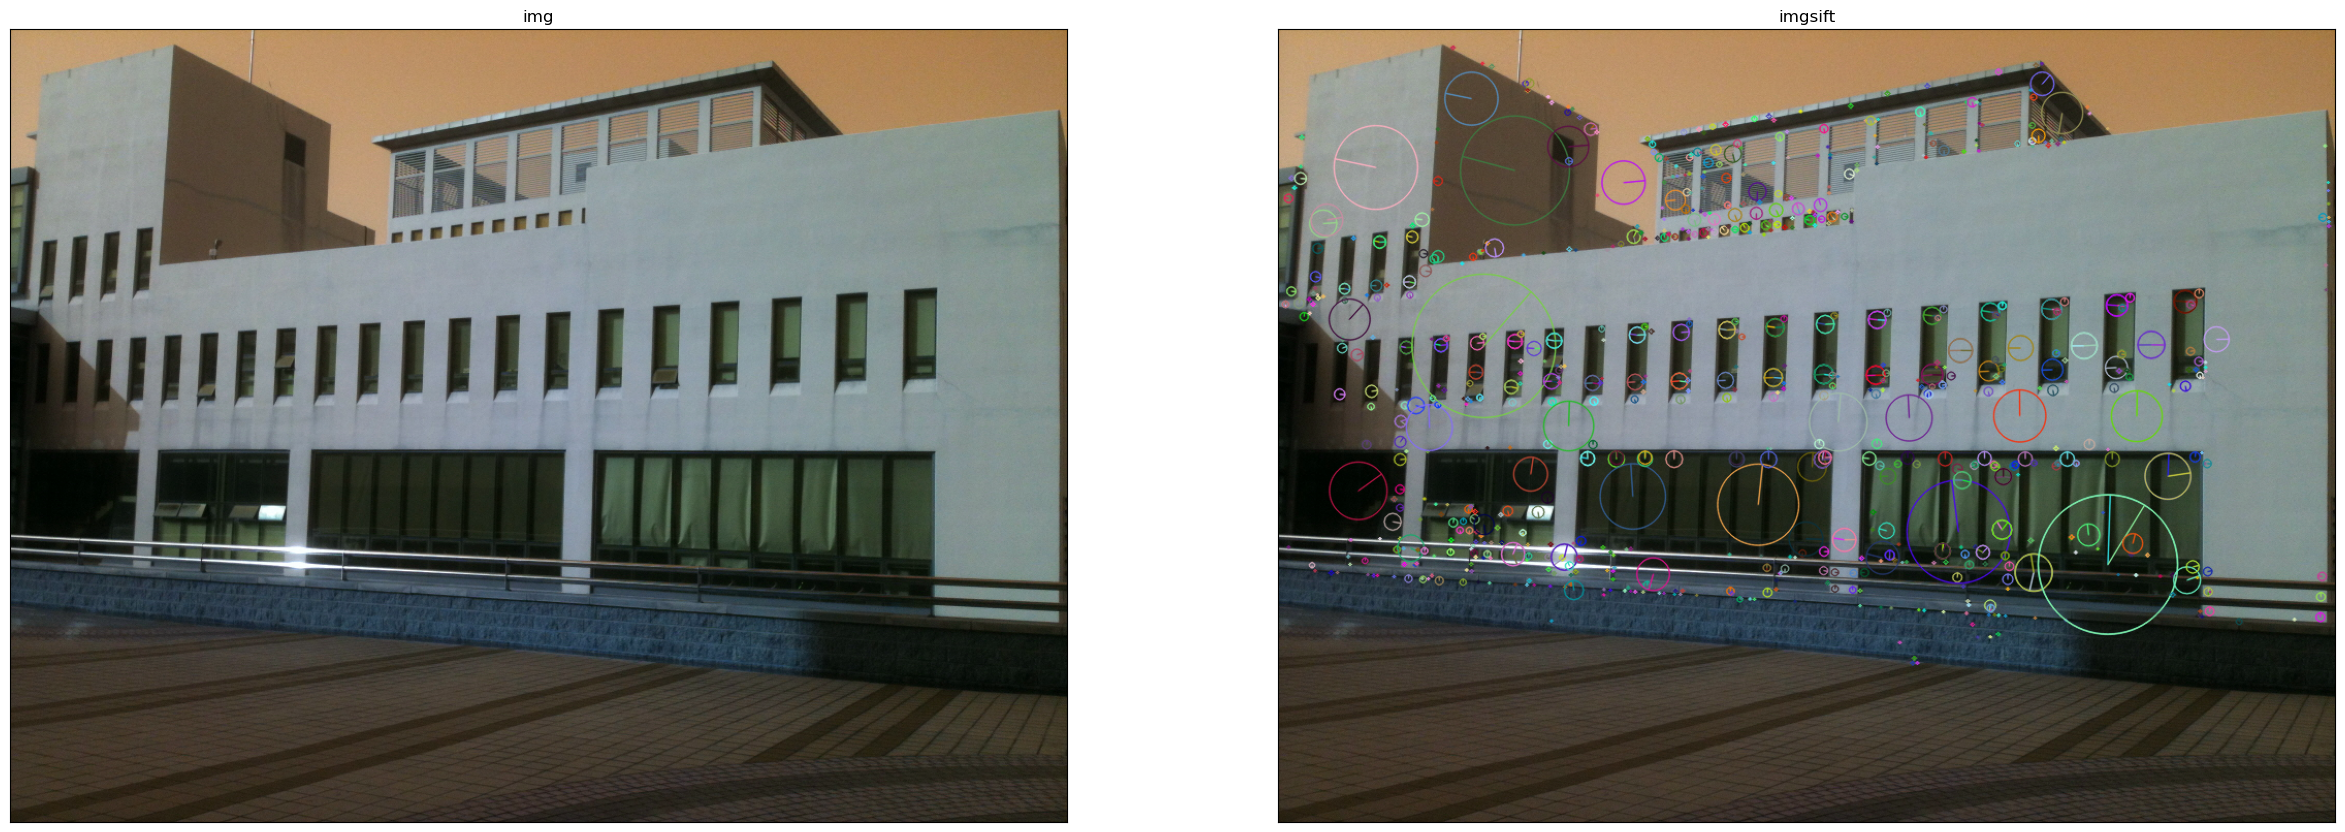

In [42]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()
